In [1]:
# from keras.models import load_model
# model = load_model('/Users/nicolasmartinez-geijovila/code/IamjustNick/wavewatcher/model/modelb7.h5')

In [156]:
from datetime import datetime
import pandas as pd
from fastapi import FastAPI
from tensorflow.keras import models
import numpy as np
import requests
from fastapi.middleware.cors import CORSMiddleware



# model state
from tensorflow.python.lib.io import file_io
from keras.models import load_model

In [163]:
model_file = file_io.FileIO('gs://waves_surfer_data/modelb7.h5', mode='rb')
temp_model_location = './temp_model.h5'
temp_model_file = open(temp_model_location, 'wb')
temp_model_file.write(model_file.read())
temp_model_file.close()
model_file.close()
model = load_model(temp_model_location)

In [164]:
model = load_model("gs://waves_surfer_data/modelb7.h5")
model

In [166]:
import requests
from io import BytesIO
import cv2 as cv
import numpy as np
from PIL import Image
def get_images(number : int):
    #Calling the api several times
    imgs = []
    url = "https://oceanbees-xbzgoqiv5a-ew.a.run.app/honey"
    for _ in range(number):
        try:
            response = requests.get(url = url)
            print(response.status_code)
            #will investigate
            #img = np.frombuffer(response.content , dtype = np.uint8)
    
            #success , img_encoded = cv2.imencode(".png" , img)

            img = Image.open(BytesIO(response.content))
            arr_img = np.array(img)
            arr_img = cv.cvtColor( arr_img , cv.COLOR_RGBA2GRAY)
            imgs.append(arr_img)
            print("all good here")
        except Exception:
            print("WOOPS! Are you sure you are doing everything ok?")
            continue
    return np.array(imgs)



In [175]:
results = get_images(10)

200
all good here
200
all good here
200
all good here
200
all good here
200
all good here
503
WOOPS! Are you sure you are doing everything ok?
200
all good here
200
all good here
200
all good here
200
all good here


In [176]:
len(results)

9

In [177]:
results = results[2:]

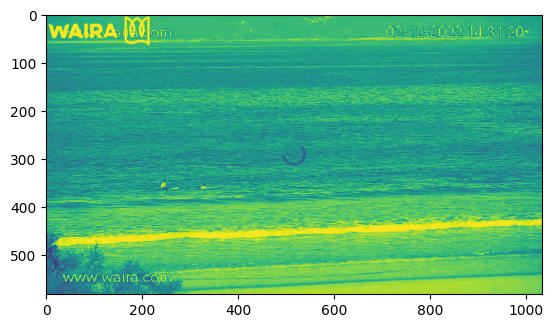

In [188]:
plt.imshow(results[5])

In [183]:
reshape_size = 300

def preprocess_image_lite(image, reshape_size=reshape_size):
    if image.shape == (570, 1015):
        cropped = image[250:-100,100:]
    elif image.shape == (582, 1034):
        cropped = image[60:500,:]
    elif image.shape == (624, 1200):
        cropped = image[150:,:]
    elif image.shape == (624, 1110):
        cropped = image[350:-100,:]
    else:
        cropped = image[150:,:]
    img = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
    img = cv.medianBlur(img,5)
    ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
                cv.THRESH_BINARY,11,2)
    #The parameters below allow to add an extra dimension (4d) it has been removed
    #for compatibility
    #     th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
    #                 cv.THRESH_BINARY,15,2)
    images =[th1,img,(th2/255)]

    return images


In [184]:
import numpy as np


processed_images = []
for result in results:
    proc = preprocess_image_lite(result, 300)
    processed_images.append(np.array([(proc)]).reshape(1,300,300,3))


In [189]:
predictions = model.predict(processed_images[5])

1/1 [==============================] - 0s 211ms/step


In [190]:
predictions

array([[0.6225665 , 0.18465295, 0.19278042]], dtype=float32)

In [191]:
outcomes = []
for image in processed_images:
    prediction = model.predict(image)
    outcomes.append(prediction)
    

1/1 [==============================] - 0s 224ms/step


In [64]:
outcomes[0]

array([[0.2641152 , 0.05753737, 0.6783474 ]], dtype=float32)

In [196]:
"chaotic, good, flat"
outcomes

[array([[0.4880722 , 0.3722065 , 0.13972133]], dtype=float32),
 array([[0.1554963 , 0.5305432 , 0.31396037]], dtype=float32),
 array([[0.27512842, 0.15097435, 0.5738972 ]], dtype=float32),
 array([[0.37759423, 0.23988743, 0.3825183 ]], dtype=float32),
 array([[0.6344653 , 0.17449754, 0.19103718]], dtype=float32),
 array([[0.6225665 , 0.18465295, 0.19278042]], dtype=float32),
 array([[0.7009583 , 0.16588822, 0.13315342]], dtype=float32)]

In [192]:

def majority_voting(predictions):
    labels = {0:"Chaotic" , 1:"Good",2:"Flat"}
    _ , counts = np.unique(predictions , return_counts=True)
    return labels.get(np.argmax(counts))

In [193]:
def return_outcome(chaotic,good,flat):
    if flat >chaotic and flat > good:
        return 2
    elif chaotic > flat and chaotic > good:
        return 0
    elif good > flat and good > chaotic:
        return 1
    else:
        return "yourmom"

In [194]:
results_voting = []
for prediction in outcomes:
    results_voting.append(return_outcome(prediction[0][0],prediction[0][1], prediction[0][2]))

In [206]:
majority_voting(results_voting)

'Chaotic'

'Chaotic'

In [140]:
from tensorflow.python.lib.io import file_io
model_file = file_io.FileIO('gs://waves_surfer_data/modelb7.h5', mode='rb')

temp_model_location = './temp_model.h5'
temp_model_file = open(temp_model_location, 'wb')
temp_model_file.write(model_file.read())
temp_model_file.close()
model_file.close()
model_2 = load_model(temp_model_location)

In [141]:
model_2.predict(processed_images[0])

1/1 [==============================] - 2s 2s/step


array([[0.37585145, 0.32198265, 0.30216593]], dtype=float32)